# Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. 

However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron.

In [62]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [63]:
# import datasets
pokemon = pd.read_csv('../1. Data Files/pokemon.csv')
die_rolls = pd.read_csv('../1. Data Files/die-rolls.csv')

In [64]:
# data information
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

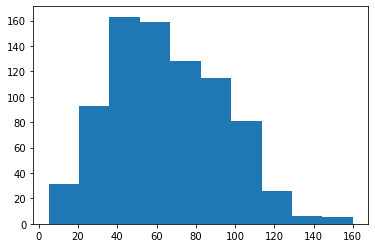

In [65]:
# plot a histogram of the distribution of speed which is a quantitative variable
plt.hist(data = pokemon, x='speed')

I have intentionally left a comma at the end of the hist function to generate more info.

The first array shows the height of the different bins while the second array shows the bin bounderies. By default, plt.hist( )offers 10 bins but we can modify by using the bins function. The bins include values on their right end and exclude values on the left end. In the case above, 20.5 belongs to the second bin. 

The bin bounderies aren't particularly alligned with the tick marks, making interpretation trickier. The fact than bin edges are non integer and the data values integer, will mean that some bins cover more integer values than others. Specify the bin bounderies explicitly to solve this problem.  

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <BarContainer object of 32 artists>)

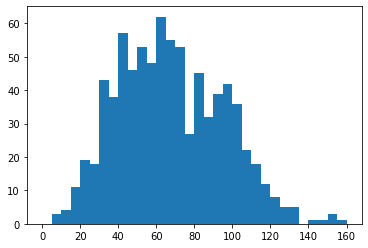

In [66]:
# specify the bin boundery explicitly
# First argument is the minimum value. Left most bin edge.
# the second argument is the maximum value. In this case, I will add +5. This is because the values generated by arange will not include the maximum value. 
# Only those things strictly lower than the max. 
# the third argument gives the step size for the bin. Bin width.
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins)

kde is Kernel density distribution. 

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

<AxesSubplot:xlabel='speed', ylabel='Count'>

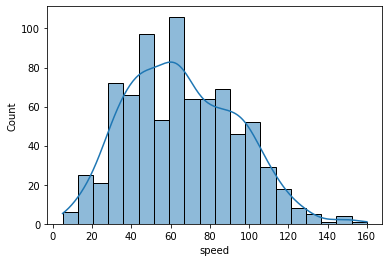

In [67]:
sb.histplot(pokemon['speed'], kde=True, bins=20)

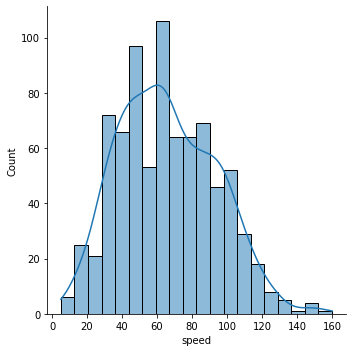

In [68]:
sb.displot(pokemon['speed'],kde=True, bins=20);

plot a graph showing the distribution of special-defenses

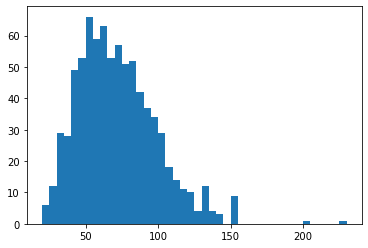

In [69]:
bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
plt.hist(data=pokemon, x='special-defense', bins=bins);

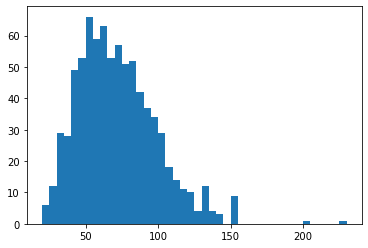

In [70]:
def histogram_solution_1():
  # data setup
    pokemon = pd.read_csv('../1. Data Files//pokemon.csv')
    bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
    plt.hist(pokemon['special-defense'], bins = bins)

histogram_solution_1()

## Figures, Axes and Subplots

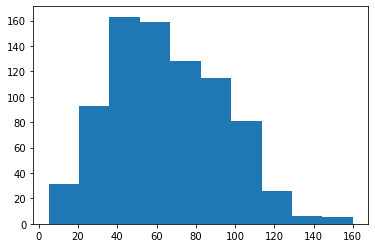

In [71]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.

ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

<Axes:xlabel='generation_id', ylabel='count'>

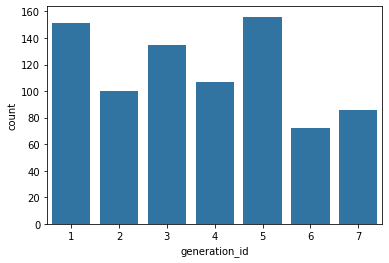

In [72]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

#### Subplots

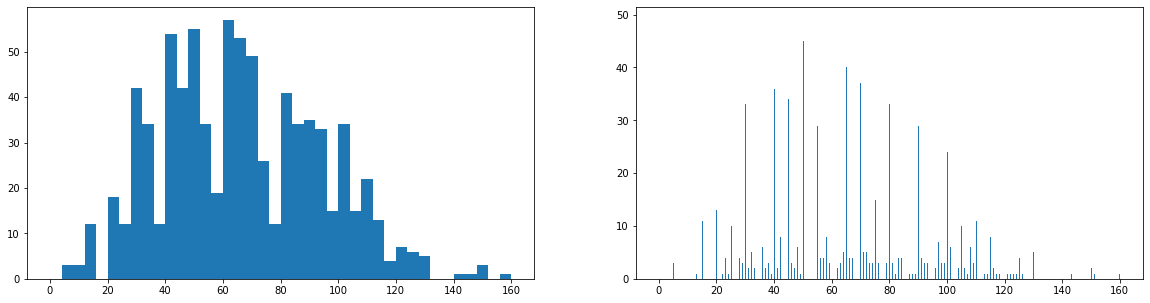

In [73]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

plot explanation.

*plt.figure(figsize = [20, 5])* creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

*plt.subplot(1, 2, 1)* creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, *plt.subplot(1, 2, 2)* creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.

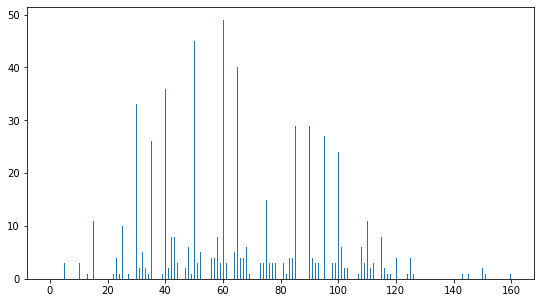

In [74]:

plt.figure(figsize = [20, 5]) 
 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

plt.subplot(1, 2, 2) 
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

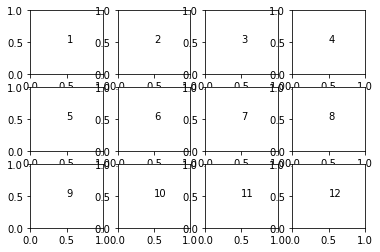

In [75]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### Choosing a plot for Discrete Data

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values (bar-width), it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

In [76]:
die_rolls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Dice     100 non-null    int64
 1   Trial 1  100 non-null    int64
 2   Trial 2  100 non-null    int64
 3   Sum      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [77]:
die_rolls.describe()

,Dice,Trial 1,Trial 2,Sum
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.330000,3.580000,6.910000
std,29.011492,1.633333,1.706671,2.429179
min,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,2.000000,5.000000
50%,50.500000,3.000000,4.000000,7.000000
75%,75.250000,5.000000,5.000000,8.000000
max,100.000000,6.000000,6.000000,12.000000


In [78]:
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


Shifting the edges of the bars can remove ambiguity in the case of Discrete data.

Assume a given bar falls in a range [10-20], and there is an observation with value 20. This observation will lie on the next bar because the given range [10-20] does not include the upper limit 20. Therefore, your readers may not know that values on bin edges end up in the bin to their right, so this can bring potential confusion when they interpret the plot.

Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges falling on the observation values in the left subplot, and bin edges in between the observation values in the right subplot.

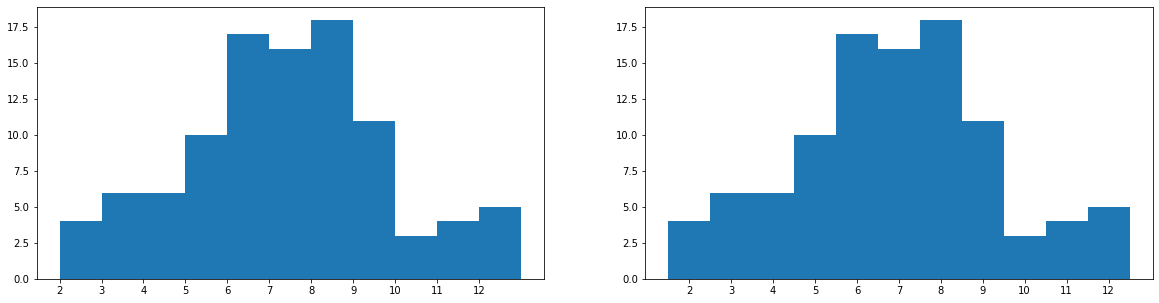

In [79]:
plt.figure(figsize=[20,5])

# histogram on the left, bin edges on integers
plt.subplot(1,2,1)
bin_edges=np.arange(2, 12+1.1, 1)
plt.hist(data=die_rolls, x='Sum', bins =bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1,2,2)
bin_edges= np.arange(1.5, 12.5+1, 1)
plt.hist(data = die_rolls, x='Sum', bins=bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

### Making gaps between individual plots

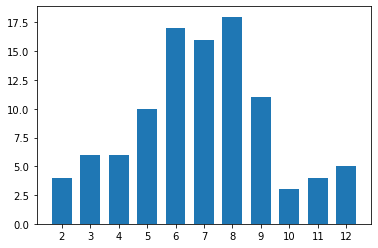

In [80]:
# With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty.
#  This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) 

Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

### Descriptive Statistics, Outliers and Axis Limits

Visualizations will give you insights into the data that you can't get from descriptive statistics. A plot can show:

- if the data is symmetric or skewed
- interesting areas for further investigation or clarification
- potential errors in the data

In a histogram, you can observe whether or not there are outliers in your data.

In a histogram, if the plot covers an unusual length, this can point to presence of outliers that are worth furthur investigation.
In cases where you have highly skewed data, you might want to change the rang of data plotted in order to zoom into parts that are more interesting. Rather than filtering the original data, you can make changes to the xlimits

In [81]:
pokemon.height.describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

(array([641., 134.,  17.,   8.,   3.,   0.,   3.,   0.,   0.,   1.]),
 array([ 0.1 ,  1.54,  2.98,  4.42,  5.86,  7.3 ,  8.74, 10.18, 11.62,
        13.06, 14.5 ]),
 <BarContainer object of 10 artists>)

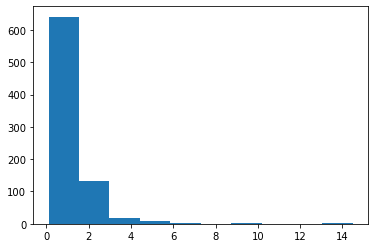

In [82]:
# create a pokemon's height histogram
plt.hist(data=pokemon, x='height')

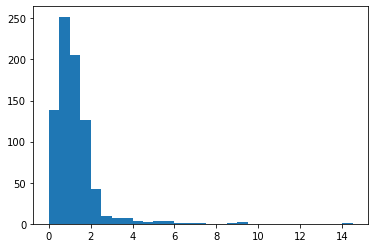

In [83]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

### Change the xlimits

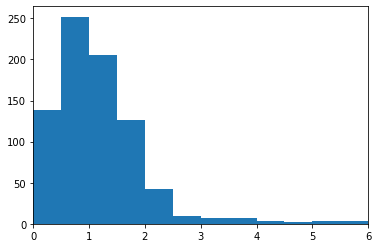

In [84]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

(0.0, 6.0)

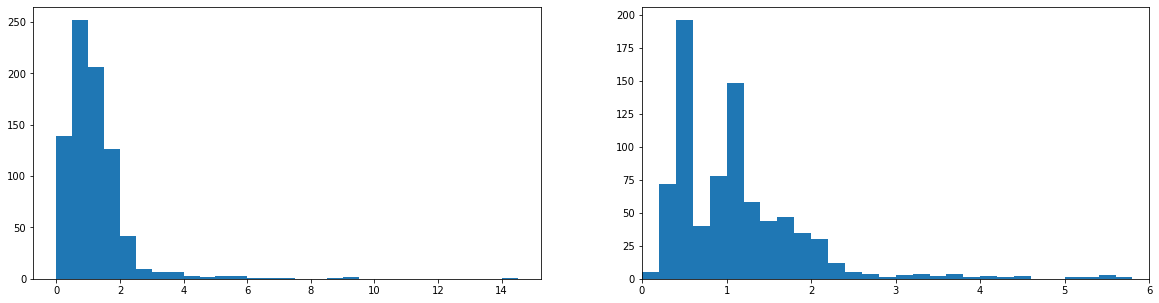

In [85]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins = bin_edges)
plt.xlim(0, 6) # could also be called as plt.xlim((0, 6))

### Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. 

In [86]:
# investigate weight data
pokemon.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

(array([683.,  65.,  32.,  14.,   3.,   2.,   1.,   1.,   2.,   4.]),
 array([1.0000e-01, 1.0008e+02, 2.0006e+02, 3.0004e+02, 4.0002e+02,
        5.0000e+02, 5.9998e+02, 6.9996e+02, 7.9994e+02, 8.9992e+02,
        9.9990e+02]),
 <BarContainer object of 10 artists>)

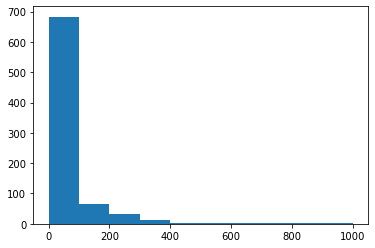

In [87]:
plt.hist(pokemon['weight'])

Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

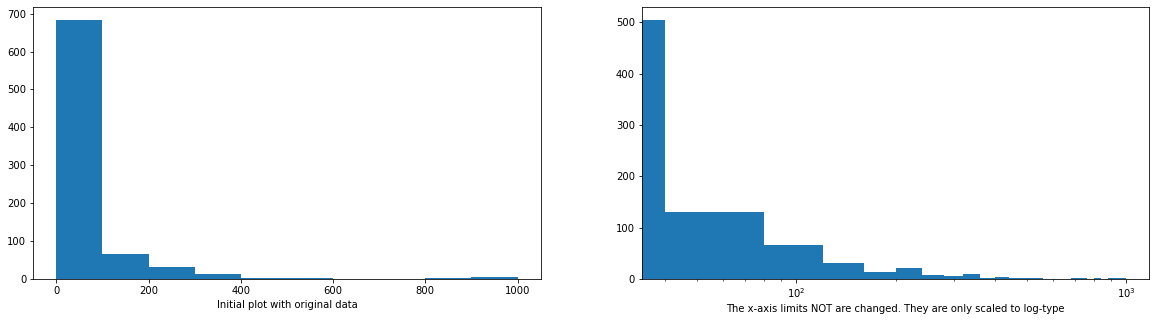

In [88]:
# create a figure
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

Notice two things about the right histogram of example above, now.

- Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicative. Matplotlib's xscale function includes a few built-in transformations: we have used the 'log' scale here.

- Secondly, the default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.
To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead.

To address the second issue of interpretation of x-axis ticks, the scale transformation is the solution. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

### Scale the x-axis to log-type, and change the axis limit.

In [89]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

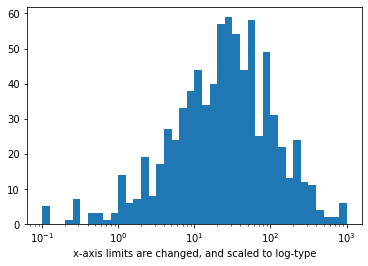

In [90]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

###  Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

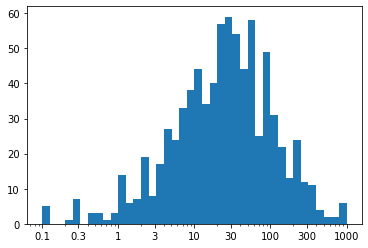

In [91]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

For the ticks, we have used xticks() to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

focus on Pokemon of height 6 meters or less, so that you can use a smaller bin size to get a more detailed look at the main data distribution.

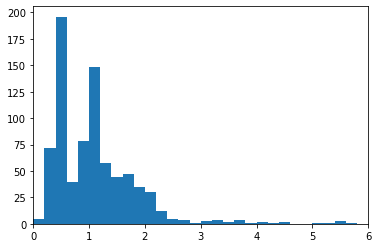

In [92]:
def scales_solution_1():
    # data setup
    pokemon = pd.read_csv('../1. Data Files/pokemon.csv')
    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))

scales_solution_1()

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.

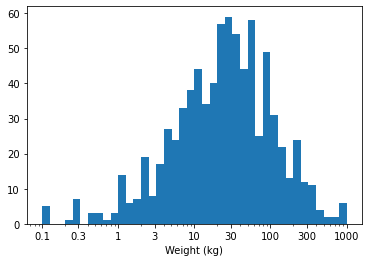

In [93]:
def scales_solution_2():
  # data setup
  pokemon = pd.read_csv('../1. Data Files//pokemon.csv')
  bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
  ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
  labels = ['{}'.format(val) for val in ticks]
  plt.hist(data = pokemon, x = 'weight', bins = bins)
  plt.xscale('log')
  plt.xticks(ticks, labels)
  plt.xlabel('Weight (kg)')

scales_solution_2()

Summary:

Quantitative variable - Histogram.

Qualitative variable - Bar chart.